<a href="https://colab.research.google.com/github/aayushkumar20/Location-Detection-Using-Google-Map-API/blob/main/Image_based_location_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install this first for complete functioning
!pip install -q gradio
#pip install "tf-nightly"
#There might be some issue with the older version of Tensorflow
#If the interpreter shows some error then please try to install (!pip install "tf-nightly") and re interprete it.
#Like "module 'tensorflow_hub' has no attribute 'KerasLayer'"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.5 MB/s eta 0:

In [2]:
# Modules required for the complition
# Importing the modules

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import gradio as gr
import PIL.Image as Image
import tensorflow as tf
import tensorflow_hub as hub

**Make sure to install all the modules and 'gradio modules' before interpreting.**

In [9]:
TF_MODEL_URL='https://tfhub.dev/google/on_device_vision/classifier/landmarks_classifier_asia_V1/1'
LABEL_MAP_URL='https://www.gstatic.com/aihub/tfhub/labelmaps/landmarks_classifier_asia_V1_label_map.csv'
IMAGE_SHAPE=(321, 321)

In [10]:
label_map = tf.keras.utils.get_file('label_map.csv', LABEL_MAP_URL)

classifier = tf.keras.Sequential([
    hub.KerasLayer(TF_MODEL_URL, input_shape=IMAGE_SHAPE + (3,), output_key='predictions:logits')
])

In [11]:
df = pd.read_csv(LABEL_MAP_URL)

In [12]:
label_map = dict(zip(df.id, df.name))

In [15]:
img_loc = "/content/Fotolia_79847717_M-1024x702.jpg" #Please change this to the location of your image including directory.
#In case you are using it on your windows machine please mention the entire path.
#Please make sure you have the same name of image as above i.e.(Image.jpeg) you can rename it as your choice.
#In case you are using it on "google colab" then please make sure that you have mounted the image file and also the mounting location with file name.

In [16]:
img=Image.open(img_loc).resize(IMAGE_SHAPE)

**in order to check whether your image is sucessfully added you can type (img)**

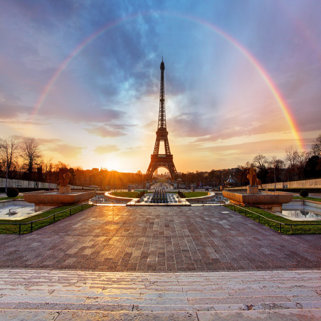

In [17]:
img
#to check
#if not detected the please try to follow the instruction in the above 2 lines.

In [18]:
img = np.array(img)/255.0
img.shape

(321, 321, 3)

In [19]:
img = img[np.newaxis, ...]

In [20]:
result=classifier.predict(img)

1/1 [==============================] - 2s 2s/step


In [21]:
result
#it'll contain the probablity values and length of the model.

array([[ 0.08552515,  0.05354802, -0.04744078, ...,  0.10876188,
         0.06960994,  0.07289226]], dtype=float32)

In [22]:
label_map[np.argmax(result)]
#it'll predict the location by using the "classifier.predict"

'Fukuoka Tower'

In [23]:
class_names=list(label_map.values())

In [24]:
def classify_image(image):
    img = np.array(image)/255.0
    img = img[np.newaxis, ...]
    prediction = classifier.predict(img)
    return label_map[np.argmax(prediction)]

**UI for user interaction**

In [28]:
image = gr.inputs.Image(shape=(321, 321))

<ipython-input-28-81598d0cdf96>:1: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(321, 321))
<ipython-input-28-81598d0cdf96>:1: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(321, 321))


In [30]:
label = gr.outputs.Label(num_top_classes=1)

gr.Interface(
    classify_image,
    image,
    label,
    capture_session=True).launch(debug=True)

<ipython-input-30-9e7dc664cc6a>:1: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label(num_top_classes=1)
<ipython-input-30-9e7dc664cc6a>:1: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label(num_top_classes=1)
<ipython-input-30-9e7dc664cc6a>:3: GradioDeprecationWarning: `capture_session` parameter is deprecated, and it has no effect
  gr.Interface(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.
